In [1]:
import pandas as pd, numpy as np, seaborn as sns, time, datetime, os
import gc
import matplotlib.pyplot as plt
%matplotlib inline

# Read in files

In [2]:
### List file path
fpath = './home-credit-default-risk/'
os.listdir(fpath)

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [3]:
### Read training data
DF_train = pd.read_csv(fpath+'application_train.csv')
### Read testing data
DF_test = pd.read_csv(fpath+'application_test.csv')
print(DF_train.shape,DF_test.shape)

(307511, 122) (48744, 121)


In [4]:
DF_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
DF_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


# Exploring data

In [6]:
### Find out how many non numeric columns in training data
DF_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
### Find which columns are non numeric
DF_train.columns[DF_train.dtypes=='object']

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [8]:
### Find out how many non numeric columns in testing data
DF_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [9]:
### Find which columns are non numeric
DF_test.columns[DF_test.dtypes=='object']

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [10]:
### Find how many loans have not been paid on time (TARGET=1)
DF_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

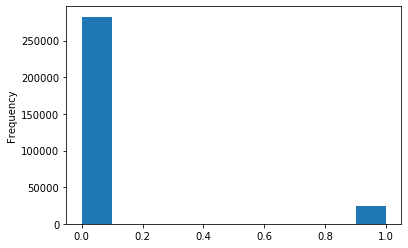

In [11]:
DF_train['TARGET'].astype(int).plot.hist()

In [12]:
### Find columns with missing values in training data
DF_train.columns[DF_train.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

## Encoding categorical variables

In [13]:
### Convert categorical columns to numerical columns using one-hot encoding
DF_train = pd.get_dummies(DF_train)
DF_test = pd.get_dummies(DF_test)
print(DF_train.shape,DF_test.shape)

(307511, 246) (48744, 242)


In [14]:
### Find anomalies in the original numerical columns
for col in DF_train.columns[:106]:
    print(col,': Min = ',min(DF_train[col]),', Max = ',max(DF_train[col]))

SK_ID_CURR : Min =  100002 , Max =  456255
TARGET : Min =  0 , Max =  1
CNT_CHILDREN : Min =  0 , Max =  19
AMT_INCOME_TOTAL : Min =  25650.0 , Max =  117000000.0
AMT_CREDIT : Min =  45000.0 , Max =  4050000.0
AMT_ANNUITY : Min =  1615.5 , Max =  258025.5
AMT_GOODS_PRICE : Min =  40500.0 , Max =  4050000.0
REGION_POPULATION_RELATIVE : Min =  0.00029 , Max =  0.072508
DAYS_BIRTH : Min =  -25229 , Max =  -7489
DAYS_EMPLOYED : Min =  -17912 , Max =  365243
DAYS_REGISTRATION : Min =  -24672.0 , Max =  0.0
DAYS_ID_PUBLISH : Min =  -7197 , Max =  0
OWN_CAR_AGE : Min =  nan , Max =  nan
FLAG_MOBIL : Min =  0 , Max =  1
FLAG_EMP_PHONE : Min =  0 , Max =  1
FLAG_WORK_PHONE : Min =  0 , Max =  1
FLAG_CONT_MOBILE : Min =  0 , Max =  1
FLAG_PHONE : Min =  0 , Max =  1
FLAG_EMAIL : Min =  0 , Max =  1
CNT_FAM_MEMBERS : Min =  1.0 , Max =  20.0
REGION_RATING_CLIENT : Min =  1 , Max =  3
REGION_RATING_CLIENT_W_CITY : Min =  1 , Max =  3
HOUR_APPR_PROCESS_START : Min =  0 , Max =  23
REG_REGION_NOT_LI

In [15]:
### Replace the anomalous value in DAYS_EMPLOYED column (=365243) with np.nan and indicate this in a new column
DF_train['DAYS_EMPLOYED_ANOM'] = (DF_train['DAYS_EMPLOYED']==365243).astype(int)
DF_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
DF_test['DAYS_EMPLOYED_ANOM'] = (DF_test['DAYS_EMPLOYED']==365243).astype(int)
DF_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

## Correlation

In [16]:
### Find correlation with the TARGET column
corr_train = DF_train.corr()['TARGET'].sort_values()
len(corr_train)

247

In [17]:
corr_train.head(10)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: float64

In [18]:
corr_train.tail(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [19]:
### Pick columns with correlation >= 0.02 or correlation <= -0.02
corr_cols = corr_train.index[(corr_train.values>=0.02)|(corr_train.values<=-0.02)].tolist()
print(len(corr_cols))

79


In [20]:
corr_cols

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'NAME_EDUCATION_TYPE_Higher education',
 'CODE_GENDER_F',
 'NAME_INCOME_TYPE_Pensioner',
 'DAYS_EMPLOYED_ANOM',
 'ORGANIZATION_TYPE_XNA',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'EMERGENCYSTATE_MODE_No',
 'HOUSETYPE_MODE_block of flats',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'WALLSMATERIAL_MODE_Panel',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'FLOORSMIN_MODE',
 'TOTALAREA_MODE',
 'ELEVATORS_MODE',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'LIVINGAREA_MODE',
 'AMT_CREDIT',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'FLAG_DOCUMENT_6',
 'NAME_HOUSING_TYPE_House / apartment',
 'APARTMENTS_MODE',
 'NAME_FAMILY_STATUS_Married',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'HOUR_APPR_PROCESS_START',
 'FLAG_PHONE',
 'NAME_INCOME_TYPE_State servant',
 'LIVINGAPARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'FONDKAPREMONT_MODE_reg oper account',
 'Y

In [21]:
### Choose columns with high correlation in magnitude only for comparison purposes
data_train = DF_train[corr_cols].copy()
data_test = DF_test[corr_cols[:-1]].copy()
print(data_train.shape,data_test.shape)

(307511, 79) (48744, 78)


In [22]:
data_train.head(3)

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_F,NAME_INCOME_TYPE_Pensioner,DAYS_EMPLOYED_ANOM,ORGANIZATION_TYPE_XNA,FLOORSMAX_AVG,FLOORSMAX_MEDI,...,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,DAYS_BIRTH,TARGET
0,0.139376,0.262949,0.083037,0,0,0,0,0,0.0833,0.0833,...,0,-2120,1,-1134.0,1,2,2,-637.0,-9461,1
1,NaN,0.622246,0.311267,1,1,0,0,0,0.2917,0.2917,...,0,-291,0,-828.0,0,1,1,-1188.0,-16765,0
2,0.729567,0.555912,NaN,0,0,0,0,0,NaN,NaN,...,0,-2531,1,-815.0,1,2,2,-225.0,-19046,0


In [23]:
data_test.head(3)

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_F,NAME_INCOME_TYPE_Pensioner,DAYS_EMPLOYED_ANOM,ORGANIZATION_TYPE_XNA,FLOORSMAX_AVG,FLOORSMAX_MEDI,...,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,DAYS_BIRTH
0,0.159520,0.789654,0.752614,1,1,0,0,0,0.125,0.125,...,0,0,-812,0,-1740.0,1,2,2,-2329.0,-19241
1,0.432962,0.291656,0.564990,0,0,0,0,0,NaN,NaN,...,1,0,-1623,1,0.0,1,2,2,-4469.0,-18064
2,0.610991,0.699787,NaN,1,0,0,0,0,NaN,NaN,...,0,0,-3503,1,-856.0,1,2,2,-4458.0,-20038


## Align training and testing data

In [24]:
train_labels = DF_train['TARGET']
train_ids = DF_train['SK_ID_CURR']
test_ids = DF_test['SK_ID_CURR']
df_train = DF_train.drop(labels=['SK_ID_CURR','TARGET'],axis=1)
df_test = DF_test.drop(labels=['SK_ID_CURR'],axis=1)
df_train,df_test = df_train.align(df_test,join='inner',axis=1)
data_train,data_test = data_train.align(data_test,join='inner',axis=1)
df_features = df_train.columns
data_features = data_train.columns
print(len(train_labels),df_train.shape,df_test.shape,data_train.shape,data_test.shape,len(df_features),len(data_features))

307511 (307511, 242) (48744, 242) (307511, 78) (48744, 78) 242 78


## Impute missing values and scale features

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [26]:
### Impute missing values with median values
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df_train)
df_train = imputer.transform(df_train)
df_test = imputer.transform(df_test)
imputer.fit(data_train)
data_train = imputer.transform(data_train)
data_test = imputer.transform(data_test)

In [27]:
### Scale each feature to a value between 0-1
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [28]:
print(df_train.shape,df_test.shape,data_train.shape,data_test.shape)

(307511, 242) (48744, 242) (307511, 78) (48744, 78)


# Logistic Regression

In [29]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [30]:
### Split training data into 3 folds for validation
kfold = KFold(n_splits=3,shuffle=False,random_state=None)
### Create the model with the specified regularization parameter
logit = LogisticRegression(C=0.001)   # Lower C signifies stronger regularization to avoid overfitting

In [31]:
### Specify which training dataset to use
df = df_train.copy()
for index_train,index_valid in kfold.split(df):
    print('Train: ',index_train[:3],' - ',index_train[-3:],', Validation: ',index_valid[:3],' - ',index_valid[-3:])
    ### Define the training and validation sets
    train_set,train_target = df[index_train],train_labels[index_train]
    valid_set,valid_target = df[index_valid],train_labels[index_valid]
    ### Train the model
    logit.fit(train_set,train_target)
    ### Find the mean accuracy of the prediction (mean score)
    predict_score = logit.score(valid_set,valid_target)
    print('Score for the prediction = ',predict_score)
    print('--------------------------------------------------')

Train:  [102504 102505 102506]  -  [307508 307509 307510] , Validation:  [0 1 2]  -  [102501 102502 102503]
Score for the prediction =  0.918822680090533
--------------------------------------------------
Train:  [0 1 2]  -  [307508 307509 307510] , Validation:  [102504 102505 102506]  -  [205005 205006 205007]
Score for the prediction =  0.918812924373683
--------------------------------------------------
Train:  [0 1 2]  -  [205005 205006 205007] , Validation:  [205008 205009 205010]  -  [307508 307509 307510]
Score for the prediction =  0.9201779460113363
--------------------------------------------------


In [32]:
### Specify which training dataset to use
df = data_train.copy()
for index_train,index_valid in kfold.split(df):
    print('Train: ',index_train[:3],' - ',index_train[-3:],', Validation: ',index_valid[:3],' - ',index_valid[-3:])
    ### Define the training and validation sets
    train_set,train_target = df[index_train],train_labels[index_train]
    valid_set,valid_target = df[index_valid],train_labels[index_valid]
    ### Train the model
    logit.fit(train_set,train_target)
    ### Find the mean accuracy of the prediction (mean score)
    predict_score = logit.score(valid_set,valid_target)
    print('Score for the prediction = ',predict_score)

Train:  [102504 102505 102506]  -  [307508 307509 307510] , Validation:  [0 1 2]  -  [102501 102502 102503]
Score for the prediction =  0.918822680090533
Train:  [0 1 2]  -  [307508 307509 307510] , Validation:  [102504 102505 102506]  -  [205005 205006 205007]
Score for the prediction =  0.918812924373683
Train:  [0 1 2]  -  [205005 205006 205007] , Validation:  [205008 205009 205010]  -  [307508 307509 307510]
Score for the prediction =  0.9201779460113363


Using all features (246 features) are the same as using features with correlation of at least 0.02 in magnitude (78 features)

In [33]:
### Predict the TARGET probabilities for the testing data
logit = LogisticRegression(C=0.001)
logit.fit(df_train,train_labels)
### First column is the probability of TARGET=0, second column is of TARGET=1
prob_logit = logit.predict_proba(df_test)[:,1]
### Create a dataframe of the prediction
df_logit = pd.DataFrame(list(zip(test_ids,prob_logit)),columns=['SK_ID_CURR','prob_logit'])
# df_logit.to_csv('Predicted_probability_logit.csv',index=False)

In [34]:
df_logit.head(3)

,SK_ID_CURR,prob_logit
0,100001,0.057738
1,100005,0.181311
2,100013,0.041129


# Random Forest

In [35]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [36]:
### Split the training data into 3 folds for validation
kfold = KFold(n_splits=3,shuffle=False,random_state=None)
### Create the random forest classifier
randomforest = RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,random_state=10,verbose=1,
                                      warm_start=False)

In [37]:
### Specify which training dataset to use
df = df_train.copy()
for index_train,index_valid in kfold.split(df):
    print('Train: ',index_train[:3],' - ',index_train[-3:],', Validation: ',index_valid[:3],' - ',index_valid[-3:])
    ### Define the training and validation sets
    train_set,train_target = df[index_train],train_labels[index_train]
    valid_set,valid_target = df[index_valid],train_labels[index_valid]
    ### Train the random forest classifier
    randomforest.fit(train_set,train_target)
    ### Find the accuracy of the prediction (mean score)
    predict_score = randomforest.score(valid_set,valid_target)
    print('Score for the prediction = ',predict_score)
    print('--------------------------------------------------')

Train:  [102504 102505 102506]  -  [307508 307509 307510] , Validation:  [0 1 2]  -  [102501 102502 102503]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


Score for the prediction =  0.9188909701084835
--------------------------------------------------
Train:  [0 1 2]  -  [307508 307509 307510] , Validation:  [102504 102505 102506]  -  [205005 205006 205007]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


Score for the prediction =  0.9189007258253337
--------------------------------------------------
Train:  [0 1 2]  -  [205005 205006 205007] , Validation:  [205008 205009 205010]  -  [307508 307509 307510]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s


Score for the prediction =  0.9202267250714613
--------------------------------------------------


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.5s finished


In [38]:
### Specify which training dataset to use
df = data_train.copy()
for index_train,index_valid in kfold.split(df):
    print('Train: ',index_train[:3],' - ',index_train[-3:],', Validation: ',index_valid[:3],' - ',index_valid[-3:])
    ### Define the training and validation sets
    train_set,train_target = df[index_train],train_labels[index_train]
    valid_set,valid_target = df[index_valid],train_labels[index_valid]
    ### Train the random forest classifier
    randomforest.fit(train_set,train_target)
    ### Find the accuracy of the prediction (mean score)
    predict_score = randomforest.score(valid_set,valid_target)
    print('Score for the prediction = ',predict_score)
    print('--------------------------------------------------')

Train:  [102504 102505 102506]  -  [307508 307509 307510] , Validation:  [0 1 2]  -  [102501 102502 102503]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


Score for the prediction =  0.9188519472410833
--------------------------------------------------
Train:  [0 1 2]  -  [307508 307509 307510] , Validation:  [102504 102505 102506]  -  [205005 205006 205007]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


Score for the prediction =  0.9188909701084835
--------------------------------------------------
Train:  [0 1 2]  -  [205005 205006 205007] , Validation:  [205008 205009 205010]  -  [307508 307509 307510]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s


Score for the prediction =  0.9203828180638616
--------------------------------------------------


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


In [39]:
### Predict the TARGET probabilities for the testing data
randomforest = RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,random_state=10,verbose=1,
                                      warm_start=False)
randomforest.fit(df_train,train_labels)
### First column is the probability of TARGET=0, second column is of TARGET=1
prob_randomforest = randomforest.predict_proba(df_test)[:,1]
### Create a dataframe of the prediction
df_randomforest = pd.DataFrame(list(zip(test_ids,prob_randomforest)),columns=['SK_ID_CURR','prob_randomforest'])
# df_randomforest.to_csv('Predicted_probability_randomforest.csv',index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [40]:
df_randomforest.head(3)

,SK_ID_CURR,prob_randomforest
0,100001,0.10
1,100005,0.07
2,100013,0.07


# Light Gradient Boosting Machine (LightGBM)

In [41]:
from sklearn.model_selection import KFold
import lightgbm as lgb

In [42]:
### Split the training data into 2 folds for validation
kfold = KFold(n_splits=2,shuffle=False,random_state=None)
### Create the lightgbm classifier
lgbmc = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=10000,objective='binary',class_weight='balanced',
                           learning_rate=0.05,reg_alpha=0.1,reg_lambda=0.1,subsample=0.8,n_jobs=-1,random_state=10)

In [43]:
### Specify which training and testing dataset to use
df1 = df_train.copy()
df2 = df_test.copy()
prob_lgbm1 = np.zeros(len(df2))   # Empty array to store prediction
for index_train,index_valid in kfold.split(df1):
    print('Train: ',index_train[:3],' - ',index_train[-3:],', Validation: ',index_valid[:3],' - ',index_valid[-3:])
    ### Define the training and testing sets
    train_set,train_target = df1[index_train],train_labels[index_train]
    valid_set,valid_target = df1[index_valid],train_labels[index_valid]
    ### Train the LightGBM classifier
    lgbmc.fit(train_set,train_target,eval_set=[(valid_set,valid_target),(train_set,train_target)],
              eval_names=['valid','train'],eval_metric='auc',early_stopping_rounds=100,verbose=400)
    ### Find the best iteration of the prediction
    best_iter = lgbmc.best_iteration_
    print('Best iteration = ',best_iter)
    ### Find the best score of the prediction
    valid_score_auc = lgbmc.best_score_['valid']['auc']
    valid_score_loss = lgbmc.best_score_['valid']['binary_logloss']
    train_score_auc = lgbmc.best_score_['train']['auc']
    train_score_loss = lgbmc.best_score_['train']['binary_logloss']
    print('Best validation score = ',valid_score_auc,', Binary logloss = ',valid_score_loss)
    print('Best train score = ',train_score_auc,', Binary logloss = ',train_score_loss)
    ### Predict the TARGET probabilities for testing data and take average
    prob_lgbm1 += lgbmc.predict_proba(df2,num_iteration=best_iter)[:,1]/kfold.n_splits
    print('--------------------------------------------------')

Train:  [153756 153757 153758]  -  [307508 307509 307510] , Validation:  [0 1 2]  -  [153753 153754 153755]
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[209]	train's auc: 0.815676	train's binary_logloss: 0.532485	valid's auc: 0.754774	valid's binary_logloss: 0.556767
Best iteration =  209
Best validation score =  0.7547742806632167 , Binary logloss =  0.5567669110728659
Best train score =  0.8156759369447579 , Binary logloss =  0.5324846702245478
--------------------------------------------------
Train:  [0 1 2]  -  [153753 153754 153755] , Validation:  [153756 153757 153758]  -  [307508 307509 307510]
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[208]	train's auc: 0.816302	train's binary_logloss: 0.532194	valid's auc: 0.755306	valid's binary_logloss: 0.552866
Best iteration =  208
Best validation score =  0.75530593340672 , Binary logloss =  0.5528655256155516
Best train score =  0

In [44]:
### Specify which training and testing dataset to use
df3 = data_train.copy()
df4 = data_test.copy()
prob_lgbm2 = np.zeros(len(df4))   # Empty array to store prediction
for index_train,index_valid in kfold.split(df3):
    print('Train: ',index_train[:3],' - ',index_train[-3:],', Validation: ',index_valid[:3],' - ',index_valid[-3:])
    ### Define the training and testing sets
    train_set,train_target = df3[index_train],train_labels[index_train]
    valid_set,valid_target = df3[index_valid],train_labels[index_valid]
    ### Train the LightGBM classifier
    lgbmc.fit(train_set,train_target,eval_set=[(valid_set,valid_target),(train_set,train_target)],
              eval_names=['valid','train'],eval_metric='auc',early_stopping_rounds=100,verbose=400)
    ### Find the best iteration of the prediction
    best_iter = lgbmc.best_iteration_
    print('Best iteration = ',best_iter)
    ### Find the best score of the prediction
    valid_score_auc = lgbmc.best_score_['valid']['auc']
    valid_score_loss = lgbmc.best_score_['valid']['binary_logloss']
    train_score_auc = lgbmc.best_score_['train']['auc']
    train_score_loss = lgbmc.best_score_['train']['binary_logloss']
    print('Best validation score = ',valid_score_auc,', Binary logloss = ',valid_score_loss)
    print('Best train score = ',train_score_auc,', Binary logloss = ',train_score_loss)
    ### Predict the TARGET probabilities for testing data and take average
    prob_lgbm2 += lgbmc.predict_proba(df4,num_iteration=best_iter)[:,1]/kfold.n_splits
    print('--------------------------------------------------')

Train:  [153756 153757 153758]  -  [307508 307509 307510] , Validation:  [0 1 2]  -  [153753 153754 153755]
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	train's auc: 0.799618	train's binary_logloss: 0.547363	valid's auc: 0.752088	valid's binary_logloss: 0.56732
Best iteration =  163
Best validation score =  0.7520878377259169 , Binary logloss =  0.5673197718955182
Best train score =  0.7996179659173639 , Binary logloss =  0.5473630947715845
--------------------------------------------------
Train:  [0 1 2]  -  [153753 153754 153755] , Validation:  [153756 153757 153758]  -  [307508 307509 307510]
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[219]	train's auc: 0.813198	train's binary_logloss: 0.5347	valid's auc: 0.752222	valid's binary_logloss: 0.555311
Best iteration =  219
Best validation score =  0.752221666977963 , Binary logloss =  0.5553108774962282
Best train score =  0.8

In [45]:
prob_lgbm = prob_lgbm1
### Create a dataframe of the prediction
df_lgbm = pd.DataFrame(list(zip(test_ids,prob_lgbm)),columns=['SK_ID_CURR','prob_lightgbm'])
# df_lgbm.to_csv('Predicted_probability_lightgbm.csv',index=False)

In [46]:
df_lgbm.head(3)

,SK_ID_CURR,prob_lightgbm
0,100001,0.259603
1,100005,0.569574
2,100013,0.170356
